# 4IQR & Log scaling

## Load Data

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
df_train = pd.read_csv('data/train.csv', sep=',')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121754 entries, 0 to 121753
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      121754 non-null  int64  
 1   X2      121754 non-null  float64
 2   X3      121754 non-null  float64
 3   X4      121754 non-null  float64
 4   X5      121754 non-null  object 
 5   X6      121754 non-null  int64  
 6   X7      121754 non-null  int64  
 7   X8      121754 non-null  object 
 8   Y1      121754 non-null  int64  
 9   Y2      121754 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 9.3+ MB


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

## 4IQR func

In [4]:
def outlier_iqr(data, column): 

    # lower, upper 글로벌 변수 선언하기     
    global lower, upper    
    
    # 4분위수 기준 지정하기     
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)          
    
    # IQR 계산하기     
    iqr = q75 - q25    
    
    # outlier cutoff 계산하기     
    cut_off = iqr * 1.5          
    
    # lower와 upper bound 값 구하기     
    lower, upper = q25 - cut_off, q75 + cut_off     
    
    print('IQR은',iqr, '이다.')     
    print('lower bound 값은', lower, '이다.')     
    print('upper bound 값은', upper, '이다.')    
    
    # 1사 분위와 4사 분위에 속해있는 데이터 각각 저장하기     
    data1 = data[data[column] > upper]     
    data2 = data[data[column] < lower]
    data = data[(data[column] < upper) & (data[column] > lower)]
    
    # 이상치 총 개수 구하기
    print('{}의 총 이상치 개수는 상한치 이상값: {} 하한치 이하값: {} 총합 {} 이다.'.format(column, data1.shape[0], data2.shape[0], data1.shape[0] + data2.shape[0]))
    return data

In [5]:
# outlier_iqr(df_train, 'X2')

In [6]:
# outlier_iqr(df_train, 'X3')

In [7]:
# outlier_iqr(df_train, 'X4')

In [8]:
# outlier_iqr(df_train, 'X6')

## Distribution visualization

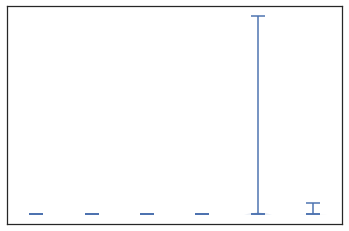

In [9]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (20, 20)
violin = ax.violinplot([df_train['X2'], df_train['X3'],df_train['X4'], df_train['X6'], df_train['Y1'], df_train['Y2']], showmeans=True)
# ax.set_ylim(0, 10000)
ax.set_xticks(np.arange(1, 7))
ax.set_xticklabels(['X2', 'X3', 'X4', 'X6', 'Y1', 'Y2'])
ax.set_xlabel('Data Type')
ax.set_ylabel('Value')

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.show()

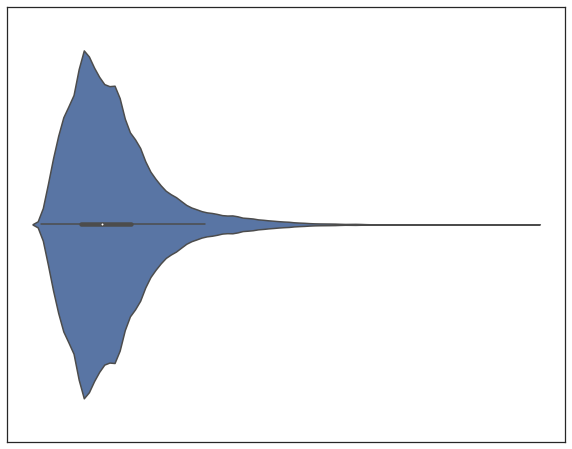

In [10]:
plt.rcParams['figure.figsize'] = (10,8)
ax = sns.violinplot(x=df_train["X2"])
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.show()

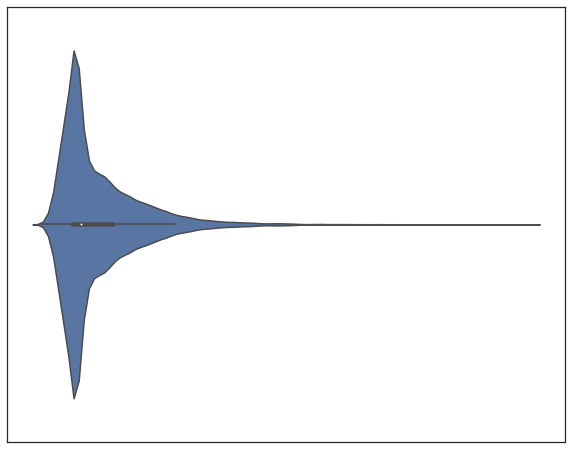

In [12]:
ax = sns.violinplot(x=df_train["X3"])
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.show()

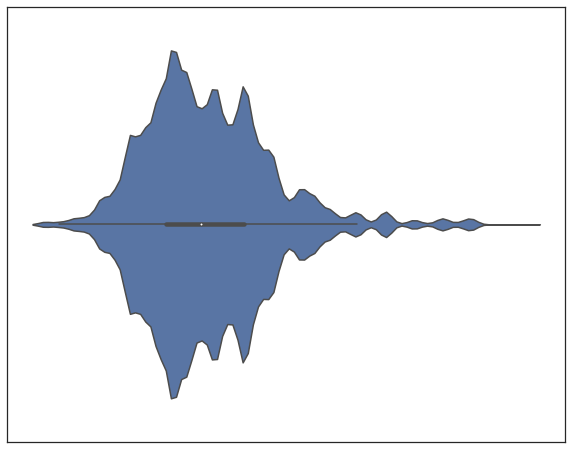

In [13]:
ax = sns.violinplot(x=df_train["X4"])
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.show()

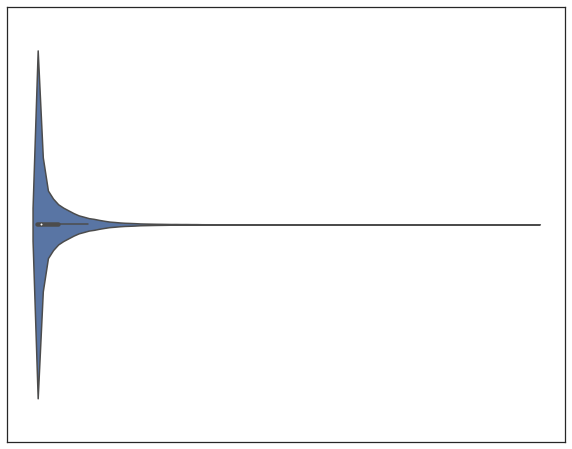

In [14]:
ax = sns.violinplot(x=df_train["X6"])
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.show()

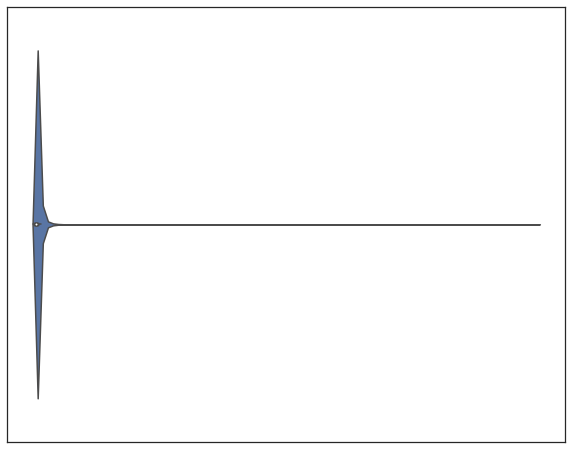

In [15]:
ax = sns.violinplot(x=df_train["Y2"])
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.show()

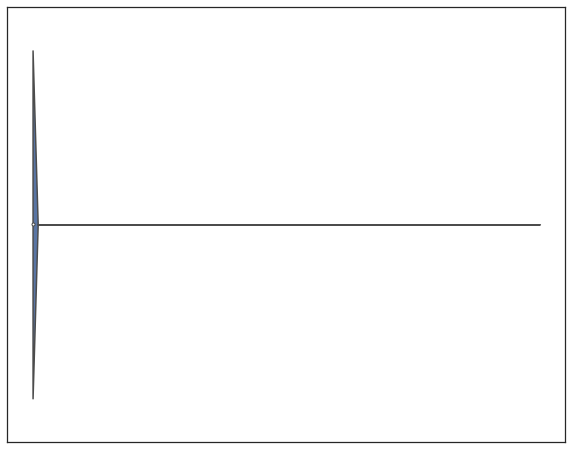

In [16]:
ax = sns.violinplot(x=df_train["Y1"])
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.show()

## Log scaling

In [18]:
df_train["X2"] = np.log1p(df_train["X2"])
df_train["X3"] = np.log1p(df_train["X3"])
# df_train["X6"] = np.log1p(df_train["X6"])

In [21]:
df_train["Y1"] = np.log1p(df_train["Y1"])
df_train["Y2"] = np.log1p(df_train["Y2"])
# df_train["X6"] = np.log1p(df_train["X6"])

In [18]:
# sns.violinplot(x=df_train["X6"])

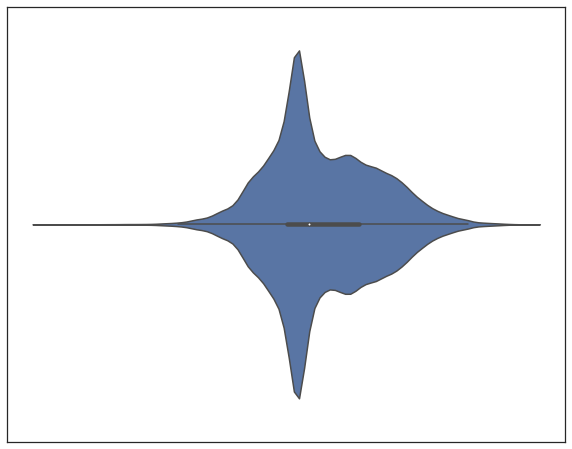

In [22]:
ax = sns.violinplot(x=df_train["X3"])
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.show()

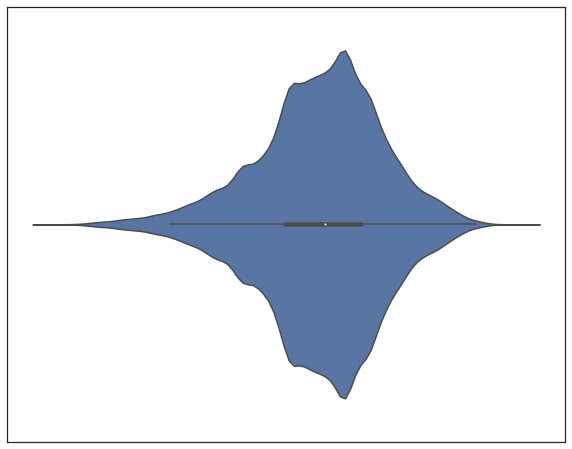

In [23]:
ax = sns.violinplot(x=df_train["X2"])
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.show()

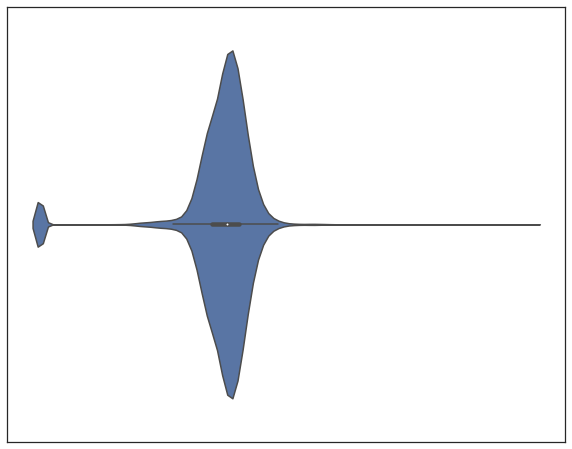

In [24]:
ax = sns.violinplot(x=df_train["Y1"])
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.show()

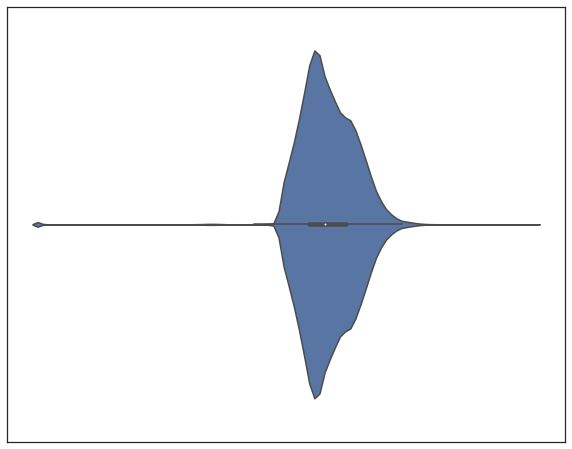

In [25]:
ax = sns.violinplot(x=df_train["Y2"])
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.show()

## 4IQR outlier detection

In [26]:
# df_train = outlier_iqr(df_train, 'X3')

In [27]:
# df_train = outlier_iqr(df_train, 'X6')

In [28]:
# df_train = outlier_iqr(df_train, 'X2')

In [ ]:
df_train = outlier_iqr(df_train, 'Y1')

In [ ]:
df_train = outlier_iqr(df_train, 'Y2')

In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114955 entries, 0 to 121753
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      114955 non-null  int64  
 1   X2      114955 non-null  float64
 2   X3      114955 non-null  float64
 3   X4      114955 non-null  float64
 4   X5      114955 non-null  object 
 5   X6      114955 non-null  int64  
 6   X7      114955 non-null  int64  
 7   X8      114955 non-null  object 
 8   Y1      114955 non-null  float64
 9   Y2      114955 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 9.6+ MB


In [32]:
# df_train = pd.get_dummies(df_train, columns = ['철판재질'])

In [33]:
# df_train["X3"] = df_train["X3"].apply(lambda x: np.exp(x))
# df_train["X2"] = df_train["X2"].apply(lambda x: np.exp(x))

## Data recovery

In [34]:
df_train["Y2"] = df_train["Y2"].apply(lambda x: np.exp(x))
df_train["Y1"] = df_train["Y1"].apply(lambda x: np.exp(x))

## Export data

In [35]:
# df_train.to_csv('train_new_tukeyfence_exp.csv', encoding='cp949', mode='w', index=False)

In [36]:
# df_test = pd.read_csv('data/test_columns.csv', sep=',', encoding='cp949')
# df_test.info()

In [37]:
# df_test["X2"] = np.log1p(df_test["X2"])
# df_test["X3"] = np.log1p(df_test["X3"])
# df_test["X6"] = np.log1p(df_test["X6"])

In [38]:
# df_test.to_csv('test_tukeyfence.csv', encoding='cp949', mode='w', index=False)